In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#iported csv data from github

df = pd.read_csv("open_pv_california_2015.csv")

/Users/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#created data frame variable 
df_climate = pd.read_csv("BuildingClimateZonesByZIPCode.csv")

In [3]:
#printed the columns with top 5 values
df.head()

,state,date_installed,incentive_prog_names,type,size_kw,appraised,zipcode,install_type,installer,cost_per_watt,...,effic_1,cust_county,tracking,inv_model_clean,mod_cost_real,inv_cost_real,bos_powerclerk_real,permitting_real,3rdparty,Filters=maxdate=1451520000&maxsize=30600&mindate=1420070400&minsize=0&state=CA
0,CA,10/2/15,NaN,uir,4.88,NaN,91340,Residential,NaN,4.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CA,12/1/15,NaN,uir,19.60,NaN,90274,Residential,NaN,2.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA,1/1/15,NaN,uir,44.90,NaN,90022,Commercial,NaN,4.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CA,1/1/15,NaN,uir,44.90,NaN,90706,Commercial,NaN,4.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CA,4/21/15,NaN,uir,54.70,NaN,92879,Commercial,NaN,4.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#created data frame variable with zip codes and size kW
df_size_zip = df[["zipcode","size_kw"]]

In [71]:
df_size_zip.head()

,zipcode,size_kw
0,91340,4.88
1,90274,19.60
2,90022,44.90
3,90706,44.90
4,92879,54.70


In [80]:
# I loop around the zip codes indexes rather than the elements itself, on every iteration I take first element of that
#zipcode using index , search for it in df_size_zip data frame zipcode column , if found then I have to average its size_kw column
#for all the instances of that specific zip code found. This average is put in a new data frame created with its 
# respective zip code 
zipcodes = df_size_zip["zipcode"].unique()
zipcodes.sort()
df_new = pd.DataFrame(index=range(len(zipcodes)),columns=["zipcode","avg_size_kw"])

for i in range(len(zipcodes)):
    b = df_size_zip[df_size_zip["zipcode"]== zipcodes[i]]
    avg = b.mean()
    df_new.iloc[i,:] = [int(avg["zipcode"]),avg["size_kw"]]
    
    


In [81]:
df_new.head()

,zipcode,avg_size_kw
0,90001,10.0579
1,90002,3.85118
2,90003,4.08442
3,90004,9.97967
4,90005,9.77667


In [82]:
df_climate.head()

,zipcode,Building CZ
0,90001,8
1,90002,8
2,90003,8
3,90004,9
4,90005,9


In [84]:
#I wanted to see if the area zip codes are corresponding with climate zone zip codes
df_climate["zipcode"].unique()

array([90001, 90002, 90003, ..., 96160, 96161, 96162])

In [106]:
#I had to convert the string "zipcode" to an integer in order to merge these two data frames together.
df_new["zipcode"] = df_new["zipcode"].astype(int)
df_new["avg_size_kw"]=df_new["avg_size_kw"].astype(float)


In [107]:
#merging average size b zip code with climate zones
df_merge = df_climate.merge(df_new)

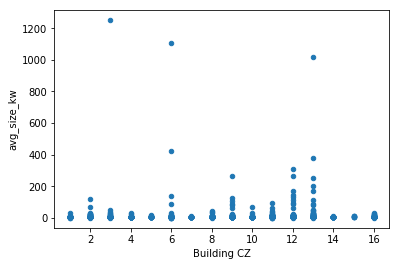

In [109]:
#%matplotlib inline used in case the scatter plot itself  wouldn't show up

df_merge.plot.scatter(x="Building CZ", y="avg_size_kw");

In [70]:
#CONCLUSION:
#There is no correlation between the climate zone and the size of the solar panels installations. 
